# Overview

The aim of this project is to build a model that predicts churn. Four data files were provided for analysis. The data files contain demography and usage data. Sampling techniques such as train/test split, and cross validation will be explored in an attempt to minimise overfitting, and results will be compared. Churn is a binary classification problem so a number of binary classification algorithms will be used to build the model. These algorithms include decision trees, random forests, logistic regression, and support vector machines. The results for these algorithms will be examined and presented. 

### Import necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

Since jupyter notebook is being used, the line of code below is needed to enable visualisation of the data.

In [2]:
%matplotlib inline

The demography and usage datasets have a vaule 'Customer ID'. So let us import and merge these datasets as no further explation were provided for having separate usage and demography datasets.

In [3]:
dem1= pd.read_csv('demography01.csv')
dem2 = pd.read_csv('demography02.csv')
usage1 = pd.read_csv('usage01.csv')
usage2 = pd.read_csv('usage02.csv')
data1 = pd.merge(dem1,usage1, how='inner')
data2 = pd.merge(dem2, usage2, how = 'inner')

Datasets demography02 and usage02, start with IDs 501. This possibly means that they are a part of a whole dataset. However, lets explore the column 'Churn within last month' on both datasets to see if there is a significant difference in value counts. 

In [227]:
data1['Churn within last month'].value_counts()

No     419
Yes     81
Name: Churn within last month, dtype: int64

In [228]:
data2['Churn within last month'].value_counts()

No     409
Yes     91
Name: Churn within last month, dtype: int64

From the counts above, we can see that there isn't a significant difference between value counts for both datasets so let us concatenate both datasets and work with a single data frame. 

In [229]:
df = pd.concat([data1, data2])

Now that the data is concatenated, let's get some basic information about our dataset by exploring the shape, head and tail. The shape methods provides information on the number of rows and columns. The head method shows the first few rows of the data as specified. The tail method does the same for the last few rows.

In [187]:
print('Data frame size is: {}'.format(df.shape))

Data frame size is: (1000, 37)


In [188]:
df.head(3)

,Customer,Geographic indicator,Months with service,Age in years,Marital status,Years at current address,Household income in thousands,Level of education,Years with current employer,Retired,...,Multiple lines,Voice mail,Paging service,Internet,Caller ID,Call waiting,Call forwarding,Three way calling,Electronic billing,Churn within last month
0,ID0001,Zone 2,13,44,Married,9,64,Graduate,5,No,...,No,No,No,No,No,No,Yes,No,No,No
1,ID0002,Zone 3,11,33,Married,7,136,Doctorate,5,No,...,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No
2,ID0003,Zone 3,68,52,Married,24,116,Did Not Complete High School,29,No,...,No,No,No,No,Yes,Yes,No,Yes,No,No


In [189]:
df.tail(3)

,Customer,Geographic indicator,Months with service,Age in years,Marital status,Years at current address,Household income in thousands,Level of education,Years with current employer,Retired,...,Multiple lines,Voice mail,Paging service,Internet,Caller ID,Call waiting,Call forwarding,Three way calling,Electronic billing,Churn within last month
497,ID0998,Zone 3,67,59,Unmarried,40,944,Doctorate,33,No,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No
498,ID0999,Zone 3,70,49,Unmarried,18,87,Completed High School,22,No,...,No,Yes,No,No,Yes,Yes,Yes,Yes,No,No
499,ID1000,Zone 3,50,36,Married,7,39,Undergraduate,3,No,...,Yes,No,No,Yes,No,No,No,No,Yes,No


Now that we have viewed some information about the dataset, lets get counts for the values in our response variable.

In [230]:
df['Churn within last month'].value_counts()

No     828
Yes    172
Name: Churn within last month, dtype: int64

The values in the reponse variable are inbalanced. Hence, an adequate sampling technique will be required to build a good model.

### Exploratory Data Analysis

Now that we have some idea of what our data looks like, let us carryout some further exploration by using the info and describe methods. The info method provides the summary of the dataset, including the data types. The describe method provides some basic statistical information on the dataset such as the percentile, mean and standard deviation.

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 499
Data columns (total 37 columns):
Customer                         1000 non-null object
Geographic indicator             1000 non-null object
Months with service              1000 non-null int64
Age in years                     1000 non-null int64
Marital status                   1000 non-null object
Years at current address         1000 non-null int64
Household income in thousands    1000 non-null int64
Level of education               1000 non-null object
Years with current employer      1000 non-null int64
Retired                          1000 non-null object
Gender                           1000 non-null object
Number of people in household    1000 non-null int64
Customer category                1000 non-null object
Toll free service                1000 non-null object
Equipment rental                 1000 non-null object
Calling card service             1000 non-null object
Wireless service                 100

In [235]:
df.describe()

,Months with service,Age in years,Years at current address,Household income in thousands,Years with current employer,Number of people in household,Long distance last month,Toll free last month,Equipment last month,Calling card last month,Wireless last month,Long distance over tenure,Toll free over tenure,Equipment over tenure,Calling card over tenure,Wireless over tenure
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.526000,41.684000,11.551000,77.535000,10.987000,2.331000,11.723100,13.274000,14.219800,13.781000,11.583900,574.050050,551.258500,465.632850,605.773750,442.736900
std,21.359812,12.558816,10.086681,107.044165,10.082087,1.435793,10.363486,16.902122,19.068539,14.084496,19.719426,789.974346,915.746733,857.273071,830.126069,971.471264
min,1.000000,18.000000,0.000000,9.000000,0.000000,1.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,32.000000,3.000000,29.000000,3.000000,1.000000,5.200000,0.000000,0.000000,0.000000,0.000000,90.137500,0.000000,0.000000,0.000000,0.000000
50%,34.000000,40.000000,9.000000,47.000000,8.000000,2.000000,8.525000,0.000000,0.000000,12.000000,0.000000,285.475000,0.000000,0.000000,332.500000,0.000000
75%,54.000000,51.000000,18.000000,83.000000,17.000000,3.000000,14.412500,24.250000,31.475000,20.500000,24.712500,755.025000,846.900000,579.450000,910.000000,316.500000
max,72.000000,77.000000,55.000000,1668.000000,47.000000,8.000000,99.950000,173.000000,77.700000,109.250000,111.950000,7257.600000,5916.000000,5028.650000,7515.000000,7856.850000


Since we are looking at a churn problem, let us get some insights into month with service. The first few questions that came to my mind are, do customers stay with Sky for a long time before they churn or do they stay for a short time, and then move to a competitor? The below graph shows a distribution plot for the variable months with service.

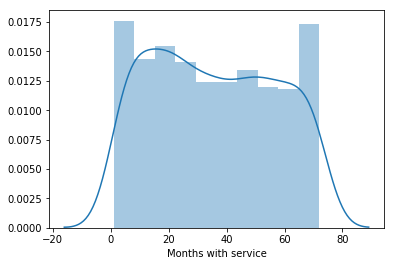

In [193]:
sns.distplot(df['Months with service'])

Let's gain more insights into months of service by visualising it against the 'Age in Years' variable.

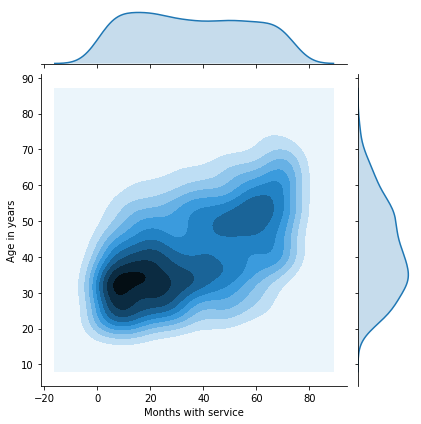

In [201]:
sns.jointplot(x= 'Months with service', y= 'Age in years', data = df, kind = 'kde')

The joint plot above looks like there are a lot of data points between ages 28 and aound 35, and less than 20 months with service. Let us explore these variables further with a scatter plot with respect to churn.

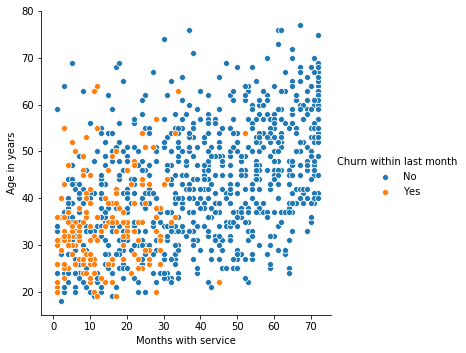

In [238]:
sns.pairplot(df, hue = 'Churn within last month', x_vars = 'Months with service', y_vars = 'Age in years', height = 5, 
             aspect = 1)

The plot above shows that most customers that churned within the last month typically spent less than 30 months with service and are mostly below 35 years of age. Although there are some exemptions as seen on the graph. Let us explore the whole dataset using a pairplot.

/Users/chidoziemgbemena/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


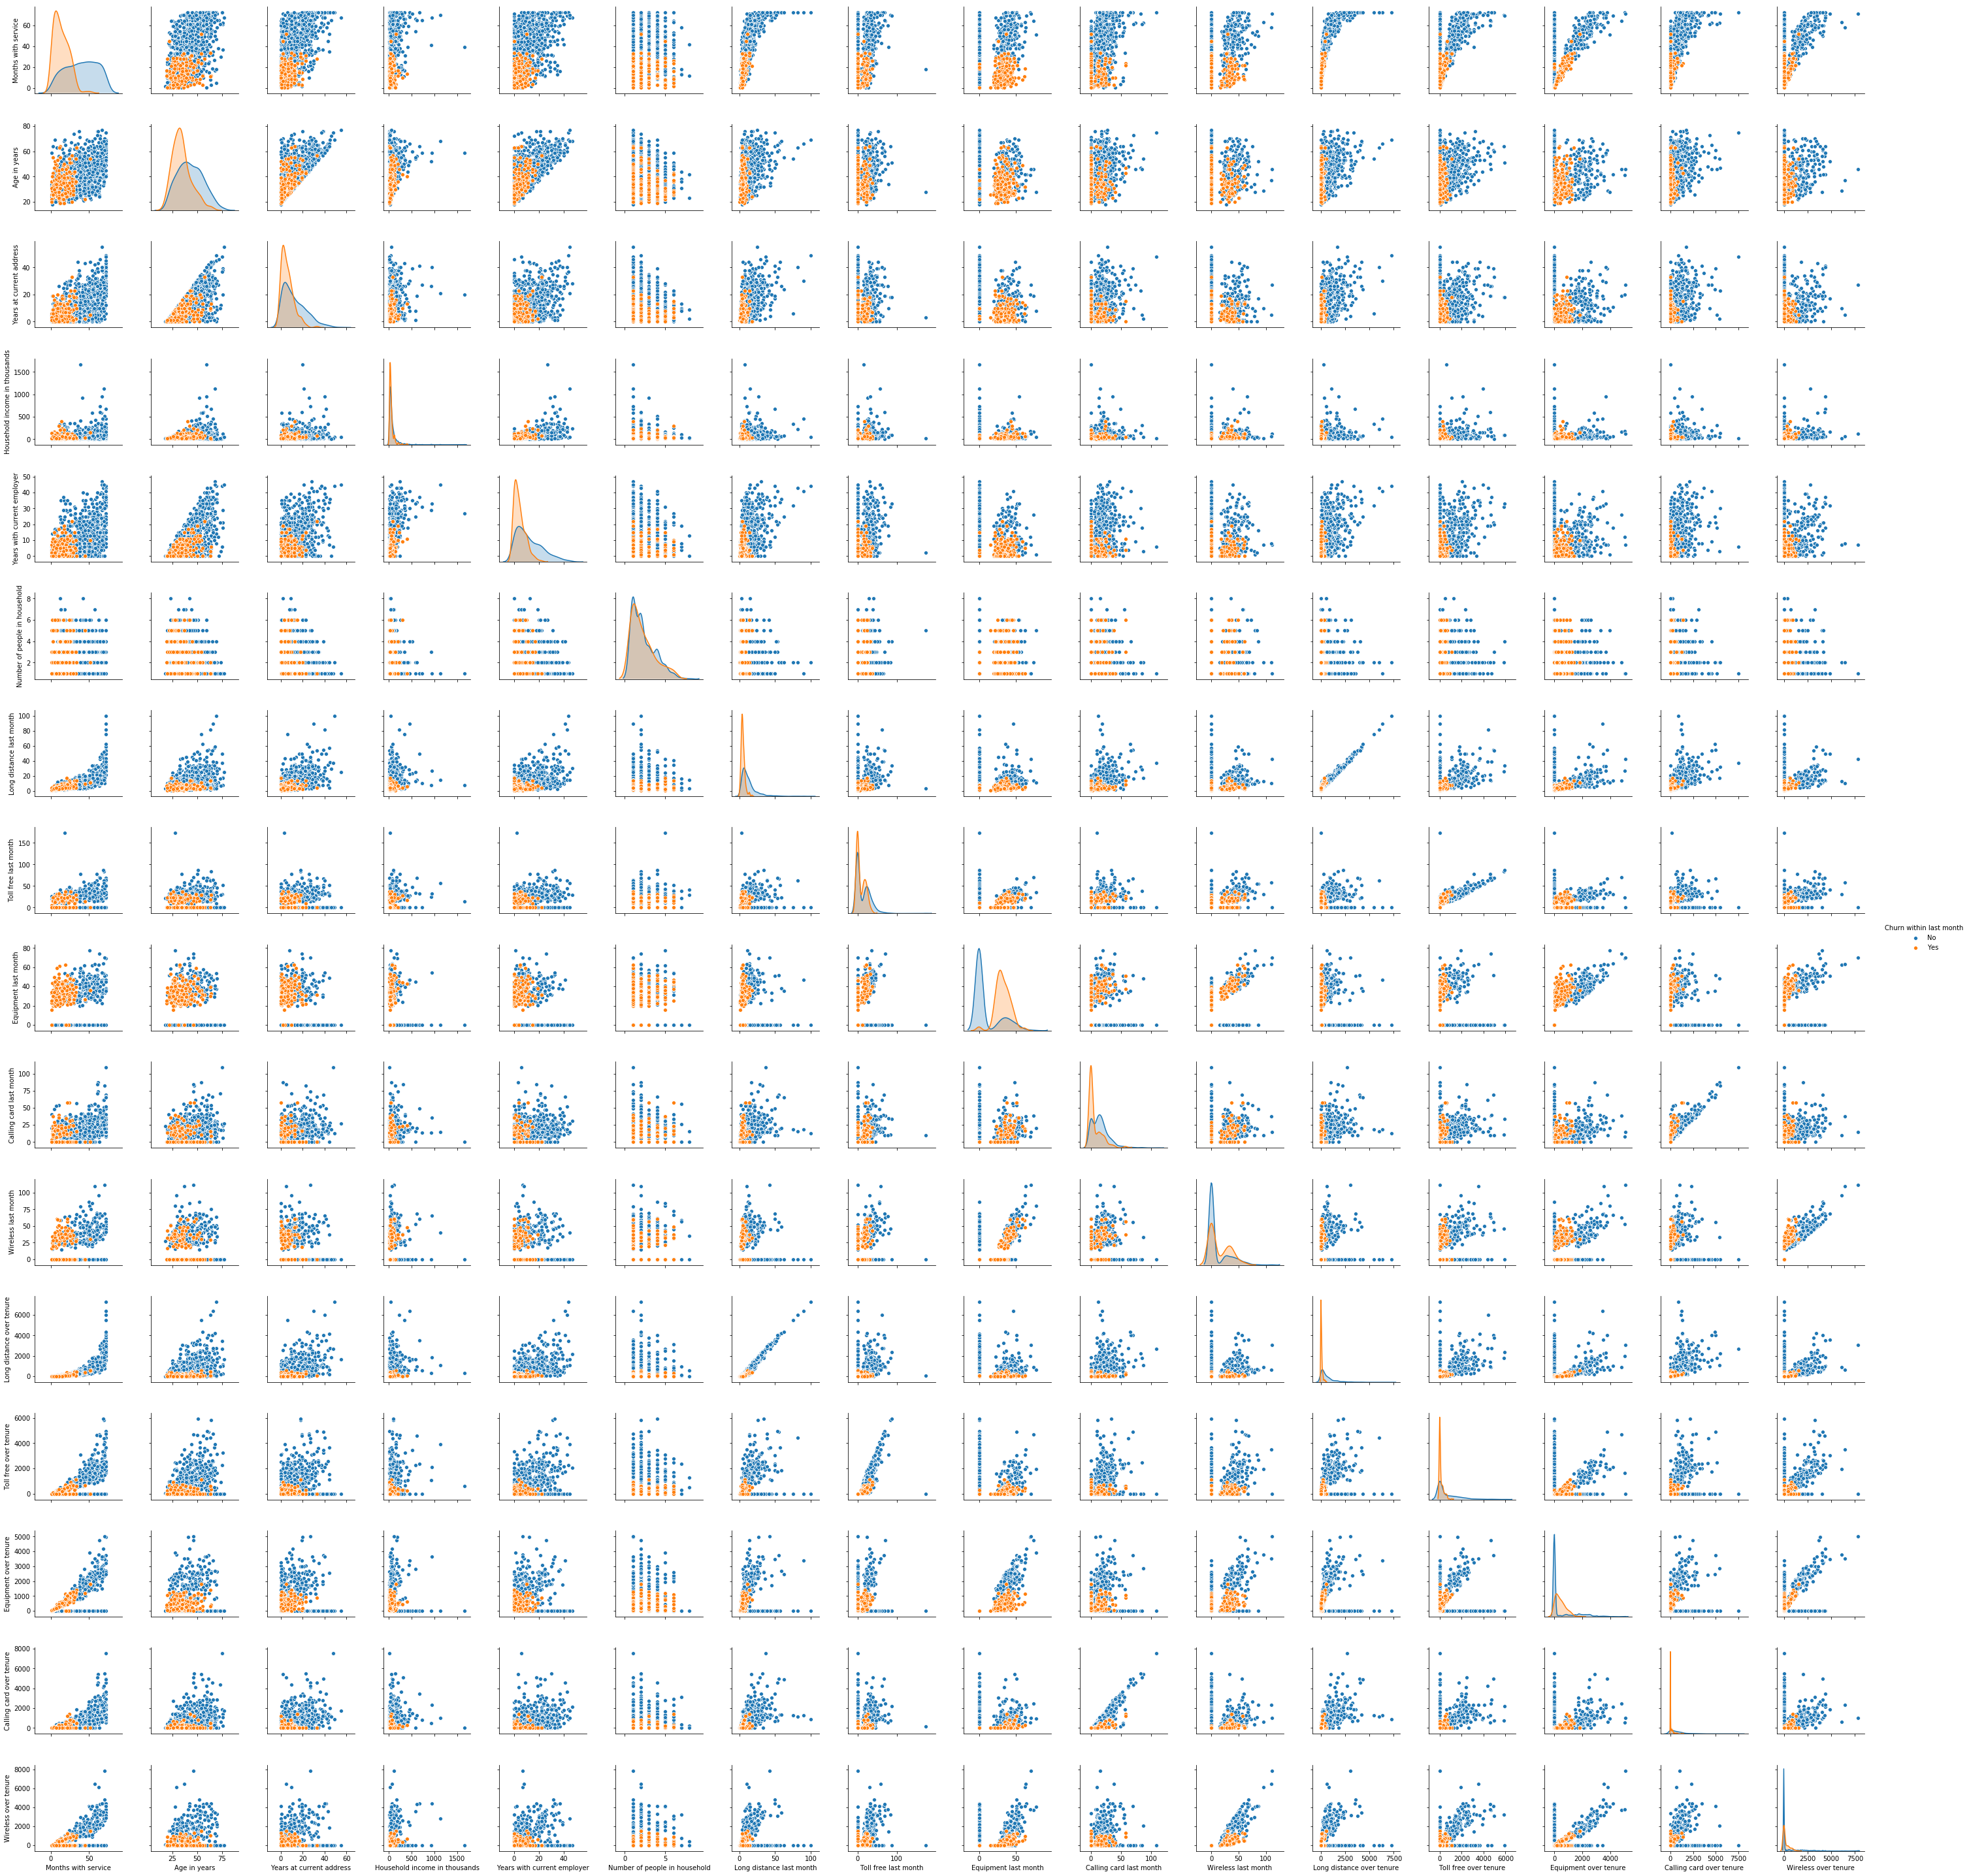

In [239]:
sns.pairplot(df, hue = 'Churn within last month')

The pairplot shows some clusters of churners and non-churns with respect to variables. We can dive into the plot a bit more, however, let us move on to uncover more insights on the dataset. 

The predictor variable has values yes and no, we need to change the values to 0 and 1. The code below assigns the new 0/1 values to variable Churn and drops the variable 'Churn within last month' as it is no longer needed.

In [241]:
def Churn(x):
    if x == 'Yes':
        return 1
    if x == 'No':
        return 0
df['Churn']= df['Churn within last month'].apply(Churn)    
df.drop(['Churn within last month'], axis = 1)

,Customer,Geographic indicator,Months with service,Age in years,Marital status,Years at current address,Household income in thousands,Level of education,Years with current employer,Retired,...,Multiple lines,Voice mail,Paging service,Internet,Caller ID,Call waiting,Call forwarding,Three way calling,Electronic billing,Churn
0,ID0001,Zone 2,13,44,Married,9,64,Graduate,5,No,...,No,No,No,No,No,No,Yes,No,No,0
1,ID0002,Zone 3,11,33,Married,7,136,Doctorate,5,No,...,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,0
2,ID0003,Zone 3,68,52,Married,24,116,Did Not Complete High School,29,No,...,No,No,No,No,Yes,Yes,No,Yes,No,0
3,ID0004,Zone 2,33,33,Unmarried,12,33,Completed High School,0,No,...,No,No,No,No,No,No,No,No,No,0
4,ID0005,Zone 2,23,30,Married,9,30,Did Not Complete High School,2,No,...,No,No,No,No,Yes,No,Yes,Yes,No,0
5,ID0006,Zone 2,41,39,Unmarried,17,78,Completed High School,16,No,...,No,No,No,No,Yes,Yes,No,No,No,0
6,ID0007,Zone 3,45,22,Married,2,19,Completed High School,4,No,...,Yes,No,No,Yes,No,Yes,No,No,Yes,0
7,ID0008,Zone 2,38,35,Unmarried,5,76,Completed High School,10,No,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,0
8,ID0009,Zone 3,45,59,Married,7,166,Graduate,31,No,...,Yes,No,No,No,Yes,Yes,Yes,Yes,No,0
9,ID0010,Zone 1,68,41,Married,21,72,Did Not Complete High School,22,No,...,Yes,No,No,No,No,No,No,No,No,0


From the above data snippet, we can see that Churn values are now 0/1. Our response variable is ready for modelling, but first, let us split the data set into training and testing samples. Train/test split has some advantages over cross validation. These advantages include:
1) Runs k times faster than k-fold cross validation.
2) Simpler to examine the detailed results of the testing process.

In [208]:
X = df[['Months with service', 'Age in years', 'Household income in thousands', 'Years with current employer', 
        'Number of people in household', 'Long distance last month', 'Toll free last month', 'Equipment last month', 
        'Calling card last month', 'Wireless last month', 'Long distance over tenure', 'Toll free over tenure', 
        'Equipment over tenure', 'Calling card over tenure', 'Wireless over tenure']]
y = df[['Churn']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

Lets examine our X and y values.

In [209]:
X.head()

,Months with service,Age in years,Household income in thousands,Years with current employer,Number of people in household,Long distance last month,Toll free last month,Equipment last month,Calling card last month,Wireless last month,Long distance over tenure,Toll free over tenure,Equipment over tenure,Calling card over tenure,Wireless over tenure
0,13,44,64,5,2,3.70,0.00,0.0,7.50,0.0,37.45,0.00,0.0,110.0,0.00
1,11,33,136,5,6,4.40,20.75,0.0,15.25,35.7,42.00,211.45,0.0,125.0,380.35
2,68,52,116,29,2,18.15,18.00,0.0,30.25,0.0,1300.60,1247.20,0.0,2150.0,0.00
3,33,33,33,0,1,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.00
4,23,30,30,2,4,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.00


In [415]:
y.tail()

,Churn
495,1
496,1
497,0
498,0
499,0


## Modelling And Evaluation

This section will explore selected binary classification algorithms and their results. In addition, performance measures such as confusion matrix, accuracy score, recall, precison and f1-score will also be presented. 

In [349]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)
print (confusion_matrix(y_test, predictions))
print ('\n')
print (classification_report(y_test, predictions))
print ('\n')
print('Accuracy score for decision trees is: {}' .format(accuracy_score(y_test, predictions)))


[[232  13]
 [ 13  42]]


              precision    recall  f1-score   support

           0       0.95      0.95      0.95       245
           1       0.76      0.76      0.76        55

   micro avg       0.91      0.91      0.91       300
   macro avg       0.86      0.86      0.86       300
weighted avg       0.91      0.91      0.91       300



Accuracy score for decision trees is: 0.9133333333333333


Decision trees produced an accuracy score of 91% and a weighted average score of 91% for precision, recall and f1-score.

### Random Forests

In [337]:
rfc = RandomForestClassifier(n_estimators=4000, random_state=42)
rfc.fit(X_train, y_train.values.ravel())
predictions = rfc.predict(X_test)
print (confusion_matrix(y_test, predictions))
print ('\n')
print (classification_report(y_test, predictions))
print ('\n')
print('Accuracy score for Random forest is: {}' .format(accuracy_score(y_test, predictions)))

[[235  10]
 [ 11  44]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       245
           1       0.81      0.80      0.81        55

   micro avg       0.93      0.93      0.93       300
   macro avg       0.89      0.88      0.88       300
weighted avg       0.93      0.93      0.93       300



Accuracy score for Random forest is: 0.93


Random forests produced an accuracy score of 93% as well as a weighted average score of 93% for precision, recall and f1-score respectively.

### Logistic Regression

In [326]:
lr = LogisticRegression(solver='lbfgs', multi_class = 'auto')
lr.fit(X_train, y_train.values.ravel())
lrPred = lr.predict(X_test)
print (confusion_matrix(y_test, lrPred))
print ('\n')
print (classification_report(y_test, lrPred))
print ('\n')
print('Accuracy score for logistic regression is: {}' .format(accuracy_score(y_test, lrPred)))

[[233  12]
 [  9  46]]


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       245
           1       0.79      0.84      0.81        55

   micro avg       0.93      0.93      0.93       300
   macro avg       0.88      0.89      0.89       300
weighted avg       0.93      0.93      0.93       300



Accuracy score for logistic regression is: 0.93


/Users/chidoziemgbemena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Logisitc regression produced an accuracy score of 93% and a weighed average score of 93% for precision, recall and f1-score respectively. 
NB- The warning above does not affect the model performance.

### Support Vector Machines

In [339]:
svm = SVC(gamma='scale')
svm.fit(X_train, y_train.values.ravel())
svmPred = svm.predict(X_test)
print (confusion_matrix(y_test, svmPred))
print ('\n')
print (classification_report(y_test, svmPred))
print ('\n')
print('Accuracy score for SVM is: {}' .format(accuracy_score(y_test, svmPred)))

[[241   4]
 [ 32  23]]


              precision    recall  f1-score   support

           0       0.88      0.98      0.93       245
           1       0.85      0.42      0.56        55

   micro avg       0.88      0.88      0.88       300
   macro avg       0.87      0.70      0.75       300
weighted avg       0.88      0.88      0.86       300



Accuracy score for SVM is: 0.88


SVM produced an accuracy score of 88% and weighted average scores of 88% for precison, 88% for recall, and 86% for f1-score. 

## Stratified Cross Validation

Stratified cross validation is suitable for this dataset becuase the values in the response variable are inbalanced. i.e  there are 828 churners and 172 non churners. Stratified sampling divides element in a population into small groups based on similarity in such a way that the elements within the group are homogenous and heterogenous among other sub groups formed. This will minimise overfitting in the model. We will use the function cross_val_score. cross_val_score uses stratified kfold by default.

#### Decision trees model performance using cross_val_score 

In [413]:
cv_dt = cross_val_score(dt, X, y, cv=10, scoring= 'accuracy')
cv_dt
cv_dt.mean()

0.9320277027702769

#### Random forest model performance using cross_val_score

In [411]:
cv_rfc = cross_val_score(rfc, X, y.values.ravel(), cv=10, scoring = 'accuracy')
cv_rfc
cv_rfc.mean()

0.948987698769877

#### Logistic regression model performance using cross_val_score

In [412]:
cv_lr = cross_val_score(lr, X, y.values.ravel(), cv=10, scoring = 'accuracy')
cv_lr
cv_lr.mean()

/Users/chidoziemgbemena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chidoziemgbemena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chidoziemgbemena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chidoziemgbemena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/chidoziemgbemena/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarni

0.9409674967496748

#### SVM model performance using cross_val_score

In [405]:
cv_svm = cross_val_score(svm, X, y.values.ravel(), cv=10, scoring = 'accuracy')
cv_svm
cv_svm.mean()

0.9060059005900589

Cross validation is a better estmate of out of sample accuracy compared to train test split. Also, from our analysis, we can see that cross validation performed better than train test split for all the algorithms explored. Random forests performed best with an accuracy of 94.8%, so from our analysis, the random forest algorithm is the best algorithm for this particular task.

### Conclusion and Future work 

Based on this analysis, the random forest algorithm performed better than other algorithms explored. It would be interesting to see how parametemeter tuning would infulence the results of algorithms used for this task. We can also explore other binary classification algorithms such as XG boost, K nearest neighbors and naive bayes to see how they will peform on this dataset. Finally, principal component analysis would be considered if there were more variables to analyse. The dataset also contains some columns with yes/no values. The values can be converted to 0s and 1s and included in building the model. 